## Objective

Build Predictive model or classification model for booking_status.

### Dataset Overview:

The dataset comprises several features:
- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered(encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date    
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading DataSet
data=pd.read_csv('Hotel Reservations.csv')
data.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


### Exploring Data

In [4]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
data.shape

(36275, 19)

In [6]:
# Checking for datatypes and null values as its give basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#Statistical description of integer and float datatypes
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Duplicates

In [8]:
data.duplicated().sum()
#No duplicates are in dataset

0

## Missing Values

In [9]:
data.isnull().sum()
#Also we dont have any null value in lour dataset

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Preperation of data for Model Learning & Predictions

In [10]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

#### **Data Booking_id contains all unique value so it won't play any role in Prediction so dropping that column**

In [11]:
data['Booking_ID'].nunique()

36275

In [12]:
data.drop(columns=['Booking_ID'],inplace=True)
data.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


# **<--------------------------------- Encoding ------------------------------------->** 
- Ordinal/Label Encoding
    - Where Order Exists
- UnOrdered Encoding Techniques
   - dummy Encoding Technique
     - where there are limited Classes
   - Feature Scaling
      - where dummy encoding is not applicable,and value count must be unique for every classes in a cloumn
   - Binary Encoding
      - where classes are many ,and value count is not unique

- Our Next Step is to convert object data Types into Numerical
- Object Data Type Column
   - type_of_meal_plan
   - room_type_reserved
   - booking_status
   - market_segment_type

In [13]:
data[['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']]

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,Meal Plan 1,Room_Type 1,Online,Canceled
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,Not Selected,Room_Type 1,Online,Canceled


## **Meal Plan Column**

In [14]:
data.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


##### **Checking For whether an Order Exists in Meal plan are Not**

In [15]:
# Creating an Empty Dataframe
stats_of_meal=pd.DataFrame(columns=['Meal_Plan','Max_Avg_Price','Average_Price'])

for meal_plan in data['type_of_meal_plan'].unique():
    subset_data=data[data['type_of_meal_plan']==meal_plan]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['avg_price_per_room'].max()
    avg_val=subset_data['avg_price_per_room'].mean()

    # Append to the DataFrame
    stats_of_meal = pd.concat([stats_of_meal, pd.DataFrame({
        'Meal_Plan': [meal_plan],
        'Max_Avg_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
stats_of_meal.sort_values(by="Max_Avg_Price")

,Meal_Plan,Max_Avg_Price,Average_Price
1,Not Selected,204.0,94.908610
3,Meal Plan 3,206.0,41.200000
2,Meal Plan 2,365.0,115.306106
0,Meal Plan 1,540.0,103.593139


#### As we can see From Max Avg Price.There exists an Order so we will be using Ordinal /Label Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
#Defining Order
Order=['Meal Plan 1','Meal Plan 2','Meal Plan 3','Not Selected']
#Intializing Obkect
Ordinal_encoder=OrdinalEncoder(categories=[Order])
#implementing on the Column
data['type_of_meal_plan']=Ordinal_encoder.fit_transform(data[['type_of_meal_plan']])

In [18]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0.0,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,3.0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,0.0,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,0.0,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,3.0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## <--------------------------------------Done With Meal Type-----------------------------------------> 

In [19]:
data['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

#### Checking For  Order


In [20]:
# Creating a dataframe
stats_for_room=pd.DataFrame(columns=['Room_Type','Max_Room_Price','Avg Room Price'])

for room_type in data['room_type_reserved'].unique():
    subset_room=data[data['room_type_reserved']==room_type]

    # Crating Min Max Values
    Max_Avg=subset_room['avg_price_per_room'].max()
    Avg_Val=subset_room['avg_price_per_room'].mean()

    #Appending in Data Frame
    stats_for_room=pd.concat([stats_for_room,pd.DataFrame({
        'Room_Type': [room_type],
        'Max_Room_Price':[Max_Avg],
        'Avg Room Price':[Avg_Val]
    })],ignore_index=True)
stats_for_room.sort_values(by='Max_Room_Price')

,Room_Type,Max_Room_Price,Avg Room Price
6,Room_Type 3,130.00,73.678571
4,Room_Type 5,250.00,123.733623
2,Room_Type 2,284.10,87.848555
5,Room_Type 7,306.00,155.198291
3,Room_Type 6,349.63,182.212836
1,Room_Type 4,375.50,125.287317
0,Room_Type 1,540.00,95.918532


##### From the above Table we can see There Exist No Order So we Will use Binary Encoding As there Are 7 Classes


In [21]:
data['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [22]:
# Create an empty DataFrame to store the results
market_segment_stats = pd.DataFrame(columns=['market_segment_type', 'Min_Avg_Price', 'Max_Avg_Price', 'Mean_Avg_Price'])

# Iterate over each unique value
for room_type in data['market_segment_type'].unique():
    subset_data = data[data['market_segment_type'] == room_type]
    
    # Calculate statistics
    min_avg_price = subset_data['avg_price_per_room'].min()
    max_avg_price = subset_data['avg_price_per_room'].max()
    mean_avg_price = subset_data['avg_price_per_room'].mean()
    
    # Append to the DataFrame
    market_segment_stats = pd.concat([market_segment_stats, pd.DataFrame({
        'market_segment_type': [room_type],
        'Min_Avg_Price': [min_avg_price],
        'Max_Avg_Price': [max_avg_price],
        'Mean_Avg_Price': [mean_avg_price]
    })], ignore_index=True)

# Display the resulting DataFrame
market_segment_stats.sort_values(by="Max_Avg_Price")

,market_segment_type,Min_Avg_Price,Max_Avg_Price,Mean_Avg_Price
3,Aviation,79.0,110.0,100.704000
4,Complementary,0.0,170.0,3.141765
2,Corporate,31.0,220.0,82.911740
1,Online,0.0,375.5,112.256855
0,Offline,12.0,540.0,91.632679


##### From Market Segment It Seems Like there Exists No order So applying Binary Encoding on That also

##### **Applying Binary Encoding On Market Segment and Room Type as there Exists no order**

In [23]:
import category_encoders as ce

In [24]:
# Intializing Object
Binary_Encoder=ce.BinaryEncoder(cols=['room_type_reserved','market_segment_type'])

#Fitting 
data=Binary_Encoder.fit_transform(data)

#### <------------------------------------------------Done With Room Type and Market Segment-------------------------------------------------->

In [25]:
data['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

### Booking Status Has No order and Less Classes So aaplying dummy encoding on it

In [26]:
##One hot dummy Encoding
data=pd.get_dummies(data,columns=['booking_status'],dtype=int)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,lead_time,...,market_segment_type_0,market_segment_type_1,market_segment_type_2,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_Canceled,booking_status_Not_Canceled
0,2,0,1,2,0.0,0,0,0,1,224,...,0,0,1,0,0,0,65.00,0,0,1
1,2,0,2,3,3.0,0,0,0,1,5,...,0,1,0,0,0,0,106.68,1,0,1
2,1,0,2,1,0.0,0,0,0,1,1,...,0,1,0,0,0,0,60.00,0,1,0
3,2,0,0,2,0.0,0,0,0,1,211,...,0,1,0,0,0,0,100.00,0,1,0
4,2,0,1,1,3.0,0,0,0,1,48,...,0,1,0,0,0,0,94.50,0,1,0


In [27]:
# Droppong Extra Column in Booking Cancel
data.drop(columns=['booking_status_Not_Canceled'],inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,lead_time,...,arrival_date,market_segment_type_0,market_segment_type_1,market_segment_type_2,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_Canceled
0,2,0,1,2,0.0,0,0,0,1,224,...,2,0,0,1,0,0,0,65.00,0,0
1,2,0,2,3,3.0,0,0,0,1,5,...,6,0,1,0,0,0,0,106.68,1,0
2,1,0,2,1,0.0,0,0,0,1,1,...,28,0,1,0,0,0,0,60.00,0,1
3,2,0,0,2,0.0,0,0,0,1,211,...,20,0,1,0,0,0,0,100.00,0,1
4,2,0,1,1,3.0,0,0,0,1,48,...,11,0,1,0,0,0,0,94.50,0,1


    Not_Canceled: 0
    Cancelled:1

### <------------------------------------------------Encoding Completed------------------------------------------------------>

In [28]:
data.shape

(36275, 22)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  float64
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved_0                  36275 non-null  int64  
 7   room_type_reserved_1                  36275 non-null  int64  
 8   room_type_reserved_2                  36275 non-null  int64  
 9   lead_time                             36275 non-null  int64  
 10  arrival_year                          36275 non-null  int64  
 11  arrival_month  

## <-----------------------------------------Feature Scaling------------------------------------------->

In [30]:
## Seperating Feature and Target
X=data.drop(columns=['booking_status_Canceled'])
y=data['booking_status_Canceled']

In [31]:
X.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,lead_time,...,arrival_month,arrival_date,market_segment_type_0,market_segment_type_1,market_segment_type_2,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0.0,0,0,0,1,224,...,10,2,0,0,1,0,0,0,65.00,0
1,2,0,2,3,3.0,0,0,0,1,5,...,11,6,0,1,0,0,0,0,106.68,1


In [32]:
y.head(3)

0    0
1    0
2    1
Name: booking_status_Canceled, dtype: int32

### Normal Test

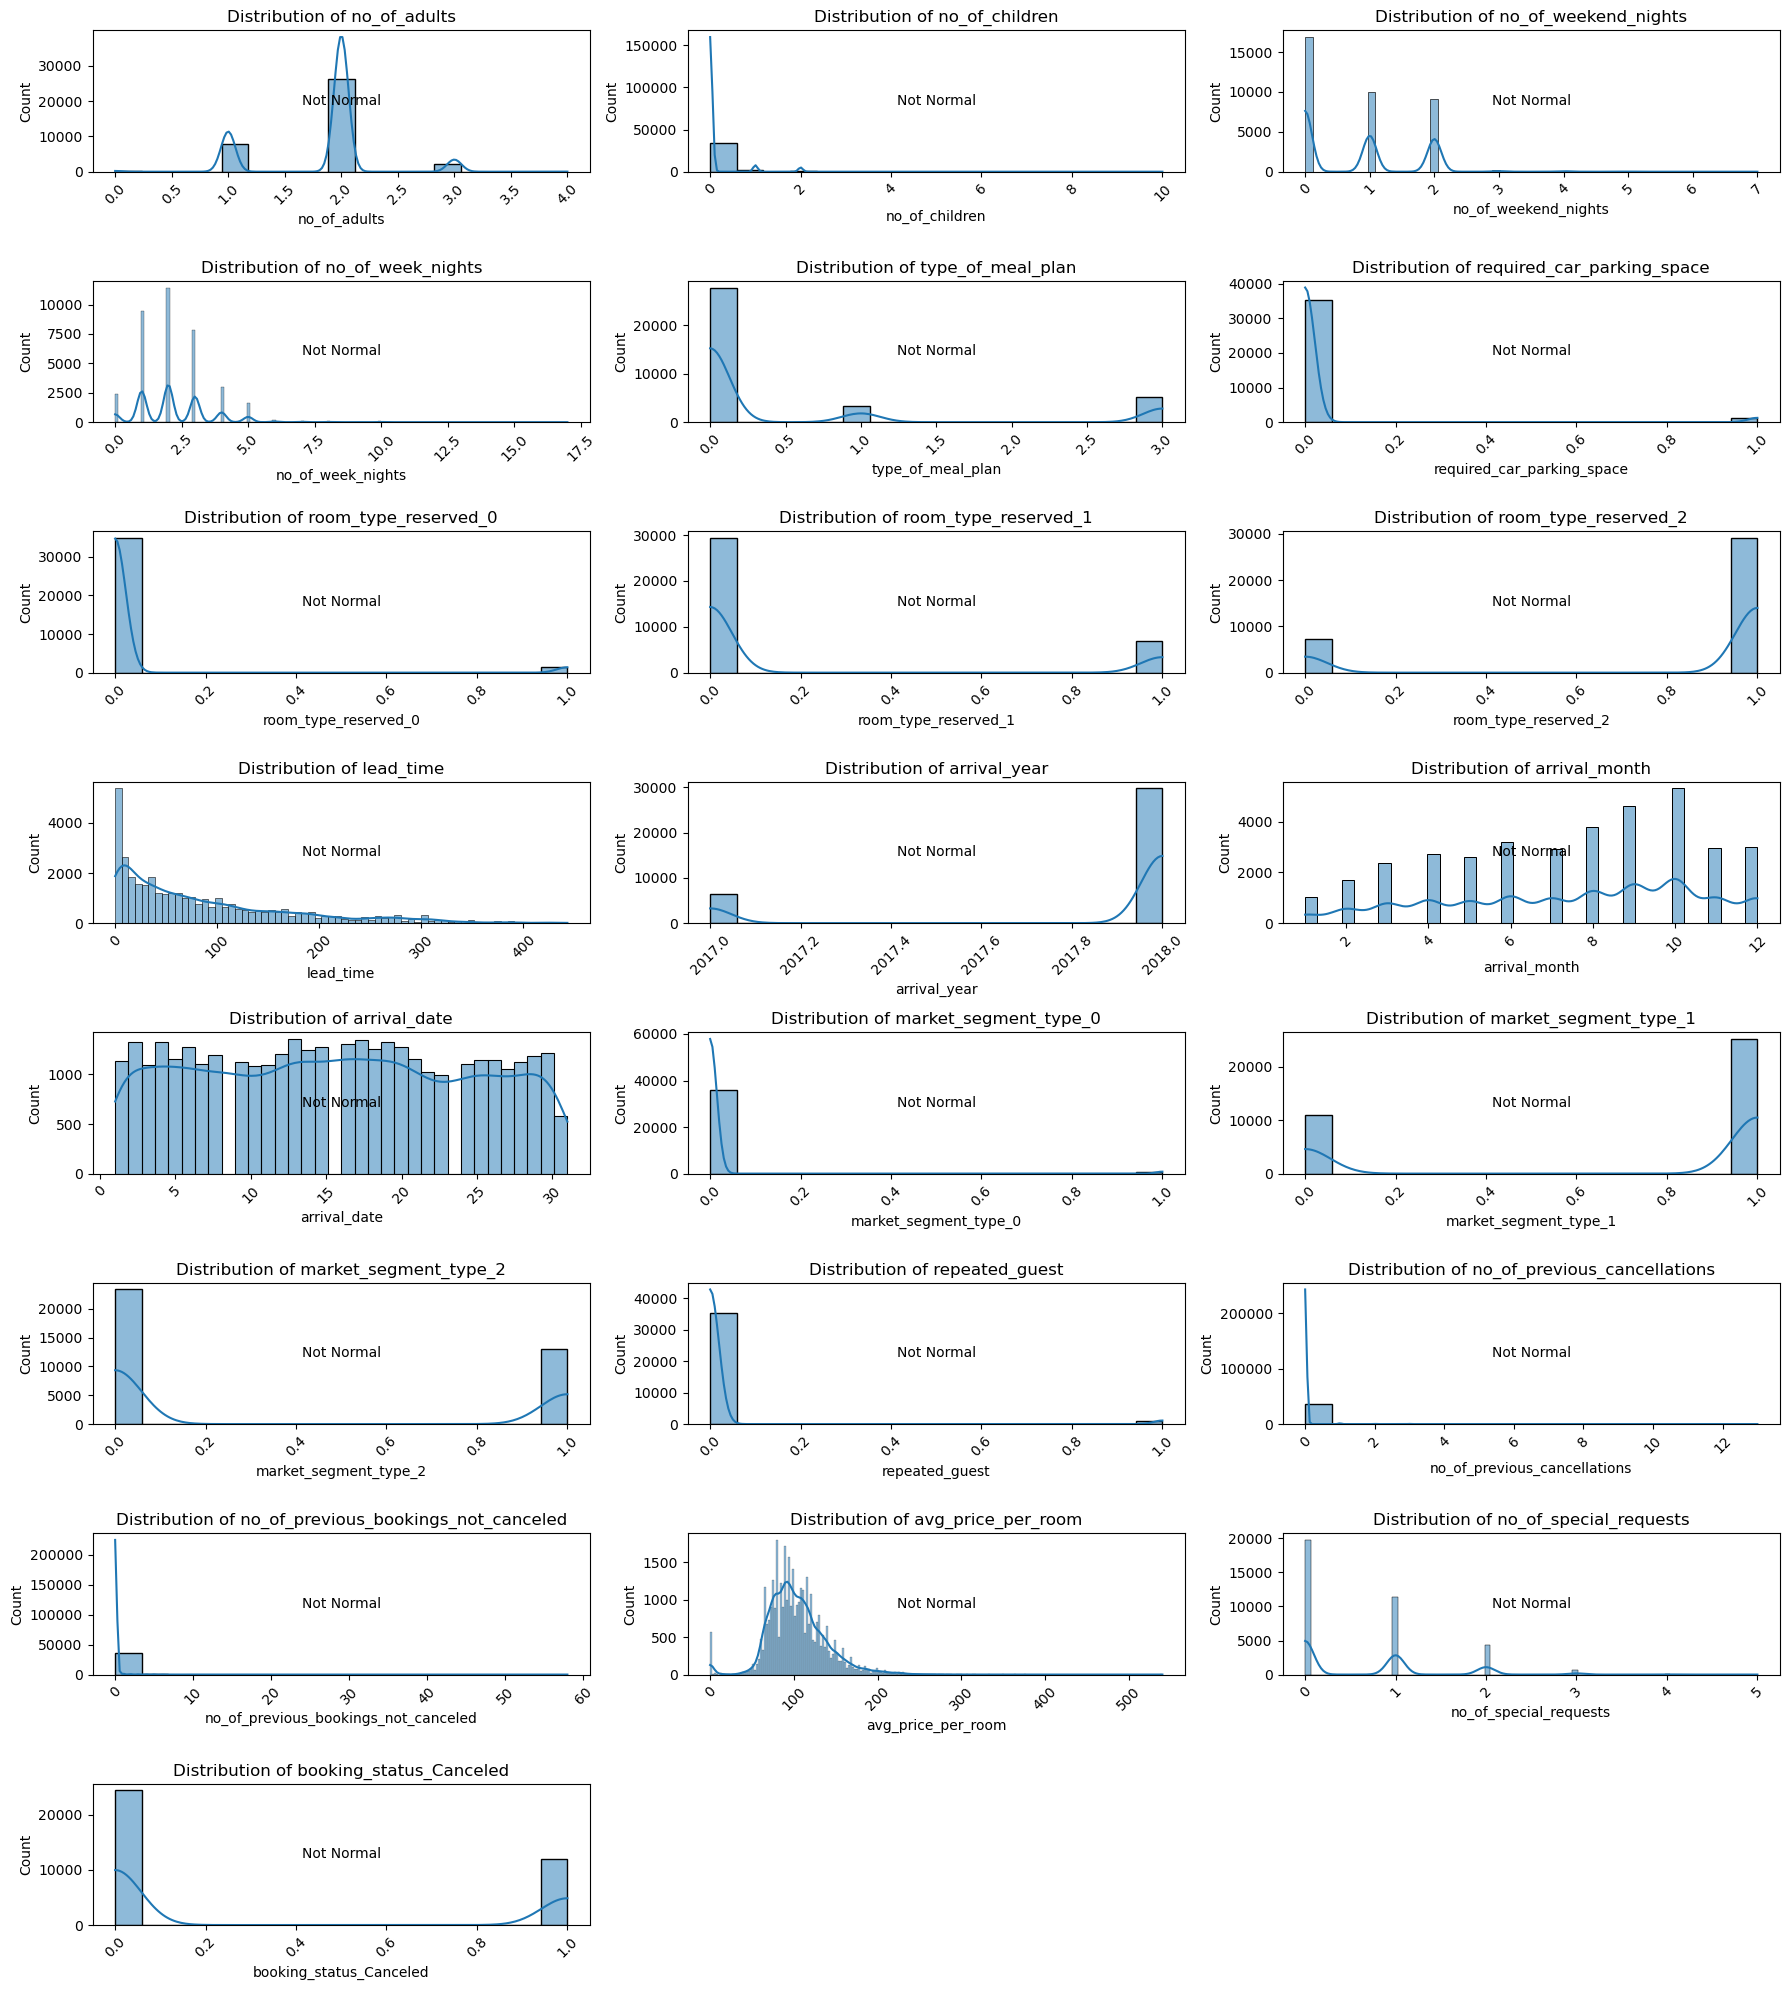

In [33]:
from scipy import stats

plt.figure(figsize=(18, 20))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(8, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Check for normal distribution
    k2, p = stats.normaltest(data[column])
    #print(k2, p )
    # null hyposthesis => The sample is from Normal dsitribution
    if (p > 0.05):
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### We dont have any normal graphed Value So we Will be Applying Normalization on Features
- MinMaxScalar


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Normalize the features
#intializing Object 
scalar=MinMaxScaler()
scalar.fit(X)
Scaled_Feature=scalar.transform(X)

In [36]:
Scaled_Feature

array([[0.5       , 0.        , 0.14285714, ..., 0.        , 0.12037037,
        0.        ],
       [0.5       , 0.        , 0.28571429, ..., 0.        , 0.19755556,
        0.2       ],
       [0.25      , 0.        , 0.28571429, ..., 0.        , 0.11111111,
        0.        ],
       ...,
       [0.5       , 0.        , 0.28571429, ..., 0.        , 0.1822037 ,
        0.4       ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.175     ,
        0.        ],
       [0.5       , 0.        , 0.14285714, ..., 0.        , 0.29938889,
        0.        ]])

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(Scaled_Feature,  y,  test_size=0.30)

70% training
30% testing

In [39]:
# To know the other parameters like random_state and shuffle, run given code
#X_train, X_test, y_train, y_test = train_test_split?

# Decision tree

1. **Step-1: Select a Feature to Split On:**
   - At the root of the tree, choose a feature from the dataset based on certain criteria (e.g., Gini impurity, information gain). This feature will be used to split the dataset into subsets.

2. **Step-2: Split the Data:**
   - Split the dataset into subsets based on the chosen feature. Each subset represents a branch of the tree.

3. **Step-3: Repeat for Each Subset:**
   - For each subset created by the split, repeat the process. Choose a new feature to split on, and create branches accordingly.

4. **Step-4: Stop Conditions:**
   - Continue splitting and creating branches until one of the stop conditions is met. Stop conditions might include reaching a certain depth, having a minimum number of samples in a node, or achieving pure subsets (all samples in a subset belong to the same class).

5. **Step-5: Assign Labels to Leaf Nodes:**
   - Once a stop condition is met, assign a label or class to each leaf node (the end points of the branches). This label is the predicted output for samples that reach that leaf.

6. **Step-6: Tree is Ready:**
   - The decision tree is now ready for making predictions. When a new sample is introduced, it follows the branches of the tree based on the feature values, and the prediction is the label assigned to the leaf node it reaches.

### Example: Decision Tree for Weather Decision

Consider building a decision tree to decide whether to play outside based on weather conditions:

```
Root Node: Is Weather Sunny?
   |
   ├── Yes --> Leaf Node: Play Outside
   |
   └── No --> Sub-Tree:
               |
               ├── Is Wind Strong?
               |     |
               |     ├── Yes --> Leaf Node: Play Inside
               |     |
               |     └── No --> Leaf Node: Play Outside
               |
               └── Another Splitting Feature...
```

In this example, the decision tree asks questions based on features (e.g., weather, wind) and guides the decision-making process until it reaches a conclusion (leaf node with a decision).

### Gini Impurity:

**Gini impurity is like a measure of how mixed up a group is.**

Imagine you have a bag of candies, and you want to know how mixed up the colors are. If the bag contains only one color of candy, it's very pure (low Gini impurity). But if it has an equal mix of all colors, it's impure (high Gini impurity).

In terms of decision trees, Gini impurity is used to measure how often you might randomly pick two candies of different colors from the bag. The lower the Gini impurity, the more pure or homogenous the group is.


$ Gini(S) = 1 - \sum_{i=1}^{c} p_i^2 $

Where:
- \( S \) is the set of all samples in a node.
- \( c \) is the number of classes in the target variable.
- \( p_i \) is the proportion of samples in class \( i \) in node \( S \).


### Entropy:

**Entropy is like a measure of surprise or uncertainty.**

Picture a drawer filled with socks, and you want to know how surprised you would be if you randomly picked a sock. If all the socks are the same color, you'd not be surprised (low entropy). But if the drawer has an equal mix of all colors, you'd be more surprised (high entropy).

In decision trees, entropy measures how uncertain you would be about predicting the color of a randomly chosen sock. The lower the entropy, the more certain or predictable the group is.


$ \text{Entropy}(S) = - \sum_{i=1}^{c} p_i \cdot \log_2(p_i) $

Where:
- \( S \) is the set of all samples in a node.
- \( c \) is the number of classes in the target variable.
- \( p_i \) is the proportion of samples in class \( i \) in node \( S \).

Note: The base of the logarithm in the entropy formula is typically 2, making it the base-2 logarithm.

The formula for Information Gain is used in decision trees to quantify the effectiveness of a feature in reducing uncertainty about the target variable. It is often used in conjunction with entropy.

### Information Gain Formula:

$ \text{Information Gain} = \text{Entropy}(S) - \sum_{j=1}^{k} \frac{|S_j|}{|S|} \cdot \text{Entropy}(S_j) $

Where:
-  S is the set of all samples in a node.
-  k is the number of subsets created by splitting node \( S \) based on a specific feature.
-  S_j  represents each subset created by the split.
-  |S_j| is the number of samples in subset \( S_j \).
-  |S| is the total number of samples in node \( S \).
- $\text{Entropy}(S)$ is the entropy of node \( S \).
- $\text{Entropy}(S_j)$ is the entropy of each subset \( S_j \).

The goal is to choose the feature that maximizes Information Gain, indicating the feature that provides the most knowledge or reduction in uncertainty about the target variable when used for splitting. In decision tree algorithms, the feature with the highest Information Gain is typically chosen for the split at each node.


**In Short:**
- Gini impurity is about how mixed up a group is.
- Entropy is about how surprised or uncertain you would be picking an element from a group.

In decision trees, these concepts help the algorithm decide how to split data to make more accurate predictions.

### **Decision Tree Implemetation**

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### **Gini**

In [57]:
# Intializing and Training the Decision Tree Classifier with Gini Impurity
dt_gini=DecisionTreeClassifier(criterion='gini',random_state=42)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
#Maxing Predictiions and Evaluating The Models
y_predict_gini=dt_gini.predict(X_test)
accuracy_gini=accuracy_score(y_test,y_predict_gini)
accuracy_gini

0.8704401359919139

## **Entropy**

In [62]:
# Intializing and Training the Decision Tree Classifier with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [63]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.8704401359919139

In [ ]:
# In Decision Tree Classification Report is not directly generated instead we pluck out single values for each\

Gini Model Evaluation Metrics:
Confusion Matrix:
 [[6583  730]
 [ 680 2890]]
Precision: 0.80
Recall: 0.81
F1 Score: 0.80
ROC AUC: 0.85

Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[6605  708]
 [ 702 2868]]
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
ROC AUC: 0.85


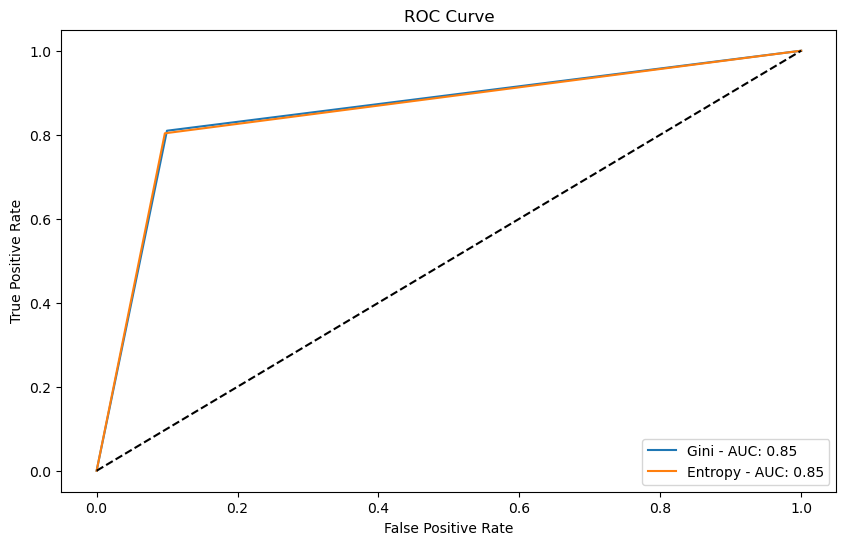

In [67]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_predict_gini)
precision_gini = precision_score(y_test, y_predict_gini)
recall_gini = recall_score(y_test, y_predict_gini)
f1_score_gini = f1_score(y_test, y_predict_gini)
roc_auc_gini = roc_auc_score(y_test, y_predict_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)
 
# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))


# ROC curve calculations
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_predict_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label='Gini - AUC: {:.2f}'.format(roc_auc_gini))
plt.plot(fpr_entropy, tpr_entropy, label='Entropy - AUC: {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


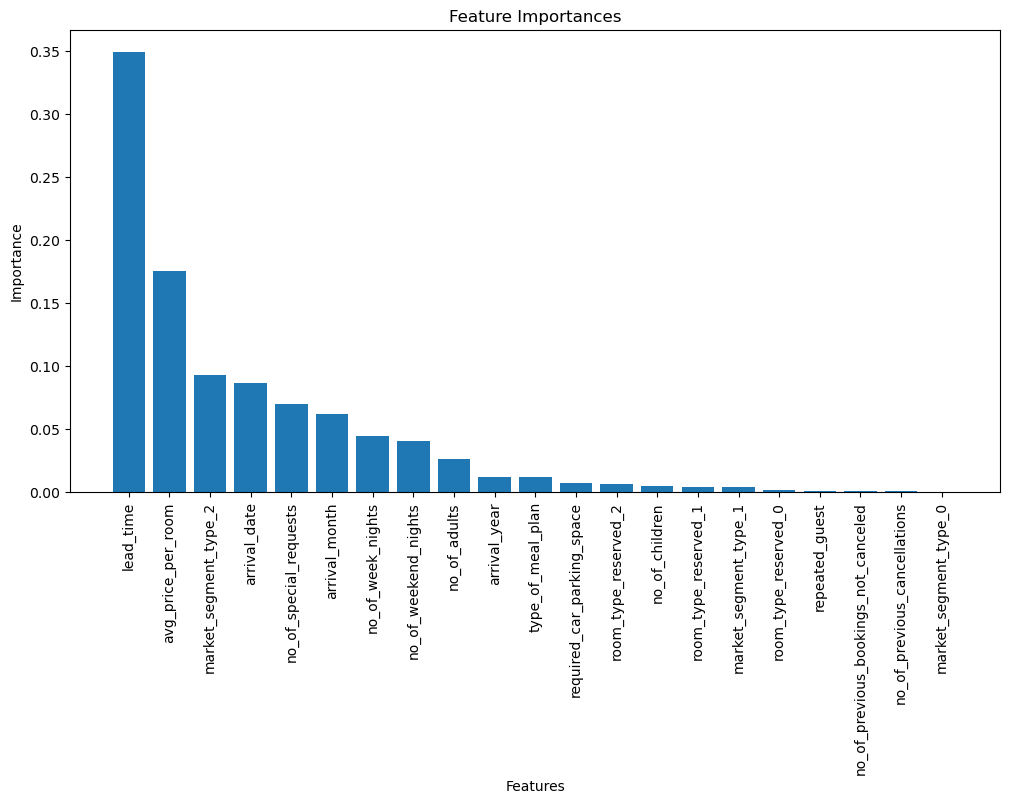

In [74]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset 'df_encoded' and target variable 'y'

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

### **Basic Deployement**

In [70]:
def predict_booking_cancellation(model, scalar, Binary_Encoder,Ordinal_encoder):
    # Input data from user
    no_of_adults = int(input("Enter number of adults: "))
    no_of_children = int(input("Enter number of children: "))
    no_of_weekend_nights = int(input("Enter number of weekend nights: "))
    no_of_week_nights = int(input("Enter number of week nights: "))
    type_of_meal_plan = input("Enter type of meal plan (Meal Plan 1/Meal Plan 2/Meal Plan 3/Not Selected): ")
    required_car_parking_space = int(input("Required car parking space (0/1): "))
    room_type_reserved = input("Enter room type reserved (Room Type 1/Room Type 2/Room Type 3/Room Type 4/Room Type 5/Room Type 6/Room Type 7): ")
    lead_time = int(input("Enter lead time: "))
    arrival_year = int(input("Enter arrival year: "))
    arrival_month = int(input("Enter arrival month: "))
    arrival_date = int(input("Enter arrival date: "))
    market_segment_type = input("Enter market segment type (Offline/Online/Digital/Corporate/Complementary/Aviation/Direct): ")
    repeated_guest = int(input("Repeated guest (0/1): "))
    no_of_previous_cancellations = int(input("Enter number of previous cancellations: "))
    no_of_previous_bookings_not_canceled = int(input("Enter number of previous bookings not canceled: "))
    avg_price_per_room = float(input("Enter average price per room: "))
    no_of_special_requests = int(input("Enter number of special requests: "))

    # Create a dataframe for the input data
    input_data = pd.DataFrame([[
        no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights,
        type_of_meal_plan, required_car_parking_space, room_type_reserved,
        lead_time, arrival_year, arrival_month, arrival_date, market_segment_type,
        repeated_guest, no_of_previous_cancellations,
        no_of_previous_bookings_not_canceled, avg_price_per_room,
        no_of_special_requests,0
    ]], columns=[
        'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
        'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
        'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
        'repeated_guest', 'no_of_previous_cancellations',
        'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
        'no_of_special_requests','booking_status'
    ]) 

    
    input_data['type_of_meal_plan'] = Ordinal_encoder.fit_transform(input_data[['type_of_meal_plan']])
    
    input_data_encoded = Binary_Encoder.transform(input_data)

    input_data_encoded.drop(['booking_status'],axis=1,inplace=True)
    # Apply feature scaling
    input_data_scaled = scalar.transform(input_data_encoded)

    # Predict the booking status
    prediction = model.predict(input_data_scaled)
    
    print("\n\n Prediction:")
    # Output the result
    if prediction[0] == 0:
        print("The booking is not likely to be canceled.")
    else:
        print("The booking is likely to be canceled.")


In [71]:
predict_booking_cancellation(dt_entropy, scalar, Binary_Encoder,Ordinal_encoder)

Enter number of adults:  2
Enter number of children:  0
Enter number of weekend nights:  0
Enter number of week nights:  2
Enter type of meal plan (Meal Plan 1/Meal Plan 2/Meal Plan 3/Not Selected):  Meal Plan 1
Required car parking space (0/1):  0
Enter room type reserved (Room Type 1/Room Type 2/Room Type 3/Room Type 4/Room Type 5/Room Type 6/Room Type 7):  Room Type 1
Enter lead time:  211
Enter arrival year:  2018
Enter arrival month:  5
Enter arrival date:  20
Enter market segment type (Offline/Online/Digital/Corporate/Complementary/Aviation/Direct):  Online
Repeated guest (0/1):  0
Enter number of previous cancellations:  0
Enter number of previous bookings not canceled:  0
Enter average price per room:  100.00
Enter number of special requests:  0




 Prediction:
The booking is likely to be canceled.


In [72]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,lead_time,...,arrival_date,market_segment_type_0,market_segment_type_1,market_segment_type_2,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_Canceled
0,2,0,1,2,0.0,0,0,0,1,224,...,2,0,0,1,0,0,0,65.00,0,0
1,2,0,2,3,3.0,0,0,0,1,5,...,6,0,1,0,0,0,0,106.68,1,0
2,1,0,2,1,0.0,0,0,0,1,1,...,28,0,1,0,0,0,0,60.00,0,1
3,2,0,0,2,0.0,0,0,0,1,211,...,20,0,1,0,0,0,0,100.00,0,1
4,2,0,1,1,3.0,0,0,0,1,48,...,11,0,1,0,0,0,0,94.50,0,1
